In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

##### Gradient Decent algoritmaları

Y = f(x) = a0 + B1x + Hata
Doğrusal regresyon algoritmaları çalıştığında a(sabit terim ) ve B(eğim) parametreleri için çeşitli değerler atayarak y'yi en iyi şekilde tahmin edicek parametreler bulmaya çalışır. 
En iyi a ve b değerlerinden kasıt HATA'nın en düşük olmasıdır



ŷj = a0 + B1xj
yj = a0 + B1xj + ej ----- ej: veri noktası için tahmin hatası
ej = ŷj - yj  ----- j hedf değişkendeki verileri temsil ediyor herhangi bir j veri noktasınınn hatası verinin gerçek değeri ile tahmin edilmiş değeri farkı.

Eğer tüm j değerleri için hesaplanan hataların karelerini toplayıp veri noktası sayısına bölersek ortalama kare hatayı (MSE) buluruz.

MSE tahmin modelinin maliyet fonksiyonudur. MSE doğası gereği U şeklinde bir paraboldur. 

Eğer bizim ŷj = a + Bx  B(eğim parameterisi) katsayısını en iyi şekilde tahmin edebilecek öznitelik değişkenini(x) ve bağımlı hedef değişkeni (y) katsayılarını değerlerini teker teker denemek için zamanımız olsaydı her modelin hatasını dikey eksene tüm B değerlerini de yatay eksene koyarsak MSE fonksiyonu gibi bir Parabol ortaya çıkar. 

yj = a0 + B1xj + ej -------------> a0 = yj - (B1xj + ej) 

Bu ortaya çıkan parabol aslında her modelin hatasını göstermektedir ve sadece bir model en düşük hataya sahiptir. Eğer rastegele bir B (eğim katsayısı) değerine göre model oluşturup hatasını ve parabol üzerinde noktanın eğimini(Q) hesaplarsak en düşük hataya doğru hareket edip etmediğimizi anlarız, Gradient Decent yani meyilli iniş algoritması mantığı buradadır.

Mesela bir B değeri atadık B1 hatası MSE1 bu değerlerin kesisimi parabol üzerinde bir nokta olur. bu noktanın eğimi ise Q1 olsun amacımız daha düşük bir hata değeri üretmek olduğundan bir sonraki hata değerinin yerini maliyet fonksiyonun Q1'e göre türevini alarak bulabiliriz ve optimum noktaya yaklaşmış oluruz. 

Bu adımları tekrar tekrar yenilersek(ıterative approach) mesela 99. tekrarda en düşük hatayı buluruz.

Gradient Decent Basitçe maliyet fonksiyonun muhtemel B(eğim katsayısı)değerleri ile türevinin alınarak en yüksek hataya sahip modelden en düşük hataya sahip modele doğru ilerlemektir. 

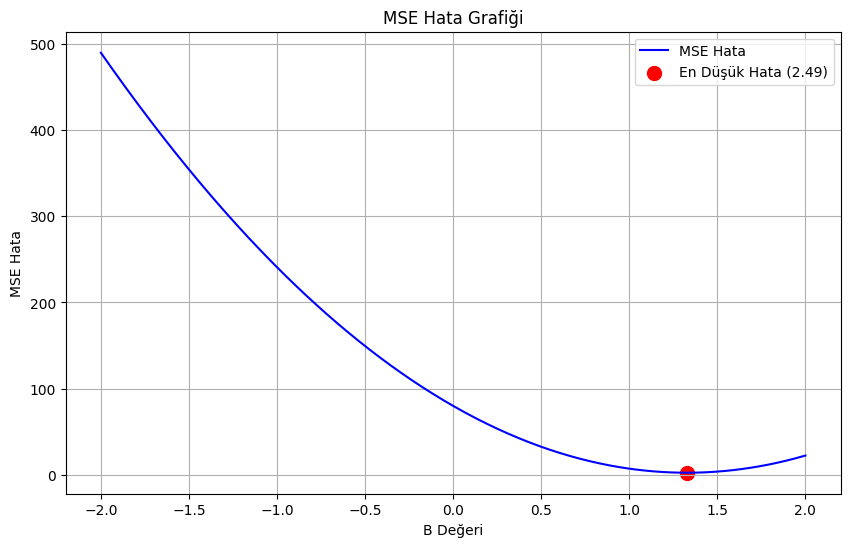

In [7]:
# GRAFİK İÇİN ÖRNEK. 
B_values = np.linspace(-2, 2, 400)

# MSE fonksiyonunu hesaplayın (örnek bir MSE fonksiyonu)
def calculate_mse(B):
    y_actual = np.array([3, 7, 5, 11, 14])
    x = np.array([1, 2, 3, 4, 5])
    y_predicted = 2 * B * x  # Örnek bir tahmin
    errors = y_predicted - y_actual
    mse = np.mean(errors**2)
    return mse

mse_values = [calculate_mse(B) for B in B_values]

# Minimum MSE'ye sahip B değerini bulun
min_mse = min(mse_values)
best_B = B_values[mse_values.index(min_mse)]


plt.figure(figsize=(10, 6))
plt.plot(B_values, mse_values, label='MSE Hata', color='b')
plt.scatter(best_B, min_mse, color='r', marker='o', label=f'En Düşük Hata ({min_mse:.2f})', s=100)
plt.title('MSE Hata Grafiği')
plt.xlabel('B Değeri')
plt.ylabel('MSE Hata')
plt.legend()
plt.grid(True)
plt.show()


##### UYGULAMA

In [8]:
df = pd.read_excel("/Users/ayhancagan/Desktop/Projects/Gradien Decent:Üsküdar Emlak Piyasası/SATILIK_EV1.xlsx")
df.head()

,Unnamed: 0,Fiyat,Oda_Sayısı,Net_m2,Katı,Yaşı
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [9]:
X = df[["Oda_Sayısı","Net_m2","Katı","Yaşı"]]
y = df["Fiyat"]

In [10]:
print(y.shape) # tek boyutlu dizi 191 elemanı var tek özelliği temsil ediyor
print(y)

(191,)
0       475
1       475
2       450
3       450
4       475
       ... 
186     875
187    1175
188     925
189     850
190     950
Name: Fiyat, Length: 191, dtype: int64


In [11]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y.values.reshape(-1,1))

In [12]:
print(y.shape)  # (191,1) iki boyutlu numpy dizisi bir sütun vektörünü veya tek bir özelliği temsil etmek için kullanılır. 
                  #İkinci boyutun 1 olması, bu dizinin bir sütun vektörü olduğunu gösterir.
print(y)

(191, 1)
[[0.03448276]
 [0.03448276]
 [0.        ]
 [0.        ]
 [0.03448276]
 [0.03448276]
 [0.03448276]
 [0.03448276]
 [0.        ]
 [0.03448276]
 [0.03448276]
 [0.10344828]
 [0.13793103]
 [0.17241379]
 [0.13793103]
 [0.17241379]
 [0.06896552]
 [0.13793103]
 [0.10344828]
 [0.06896552]
 [0.13793103]
 [0.06896552]
 [0.13793103]
 [0.13793103]
 [0.17241379]
 [0.06896552]
 [0.06896552]
 [0.10344828]
 [0.10344828]
 [0.17241379]
 [0.06896552]
 [0.06896552]
 [0.17241379]
 [0.06896552]
 [0.17241379]
 [0.10344828]
 [0.06896552]
 [0.06896552]
 [0.24137931]
 [0.06896552]
 [0.20689655]
 [0.24137931]
 [0.24137931]
 [0.20689655]
 [0.13793103]
 [0.17241379]
 [0.06896552]
 [0.10344828]
 [0.24137931]
 [0.10344828]
 [0.13793103]
 [0.20689655]
 [0.17241379]
 [0.17241379]
 [0.24137931]
 [0.13793103]
 [0.06896552]
 [0.13793103]
 [0.34482759]
 [0.31034483]
 [0.24137931]
 [0.24137931]
 [0.27586207]
 [0.31034483]
 [0.34482759]
 [0.37931034]
 [0.34482759]
 [0.31034483]
 [0.27586207]
 [0.37931034]
 [0.2413793

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

##### STOKASTIK MEYİLLİ İNİŞ (SGD)

Meyilli iniş sürekli kendi kendini güncelleyen bir algoritmadır. SGD rassal bir Hata-B kesisim noktasından başlayıp belli aralıklarla B için farklı ağırlık değeri atayarak en düşük hata değerine yaklaşmayı hedefler. İki kritik hiperparametre vardır Nereden başlayacak ve adım boyu ne olacak? Eğer adım boyu büyük olursa optimum noktayı kaçırabilir

Meyilli iniş algopritmaları başlı başına bir model değil doğrusal regresyon gibi modeller için optimizasyon yapmaya yarıyor
Veri seti büyüdükçe optimizasyon ihtiyacı artar. SGD uygulamak öngörü hatalarını azaltır.

In [14]:
from sklearn.linear_model import SGDRegressor

In [15]:
# SD Reg için Izgara Araması 
sgd_reg = SGDRegressor(random_state=42,penalty="elasticnet")

In [ ]:
from sklearn.model_selection import GridSearchCV

parametreler = {"alpha":[0.0001,0.001,0.01],
"eta0":[0.0001,0.001,0.01,0.1],
"l1_ratio":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
"learning_rate":["constant","optimal","invscaling","adaptive"],
"max_iter":[50,100,500,1000]}

sgd_reg_GS = GridSearchCV(estimator=sgd_reg,param_grid=parametreler,n_jobs=-1,scoring="r2",cv=5)

sgd_reg_GS.fit(X_train,Y_train)

In [17]:
print(sgd_reg_GS.best_params_)
print(sgd_reg_GS.best_estimator_)
print(sgd_reg_GS.best_score_)

{'alpha': 0.001, 'eta0': 0.1, 'l1_ratio': 0.7, 'learning_rate': 'adaptive', 'max_iter': 50}
SGDRegressor(alpha=0.001, eta0=0.1, l1_ratio=0.7, learning_rate='adaptive',
             max_iter=50, penalty='elasticnet', random_state=42)
0.7083899182622208


#### SGD hiperparametresi sonucu :

En uygun adım boyu eta0: 0.1 olarak bulundu en uygun l1_ratio ise 0.7 bulundu. l1_ratio eğer 1 çıksaydı lasso(l1) göre eğer 0 çıksaydı ridge (l2) göre yapılcaktı

arasında değer olmasının anlamı elasticnet regresyonuna göre değerlendireleceğidir. SGD optimizasyonun ElastikNet doğrusal reg üzerinden yapılması sonucu hiçbir 

öznitelik değişkeni çıkartılmamıştır  l1_ratio eğer 1 çıksaydı bazı öznitelikler çoklu doğrusal bağlantıya sebeb oluyor değerlendirmesi ile sıfıra itilecekti.

alpha:0.001 bunun anlamı SGD optimizasyon algoritmasının elasticnet ile ürettiği modelin klasik doğrusal regresyon ile üretilen modele ne kadar yakın olduğunu 

gösterir yani klasik regresyon modeli en düşük hatayı veren model ile çok benzerdir ancak bazı öznitelik değişkenlerini gereksiz görüp modelden çıkartmıştır.

In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score
skorlar = cross_val_score(estimator=sgd_reg_GS.best_estimator_,X=X_train,y=Y_train,cv=5)

In [19]:
print(skorlar) # rassal oluşturulmus 5 eğitim seti üzerinden modellerin r2leri ve bunların ort bize doğru yolda olduğumuzu gösterir.
print(skorlar.mean())
print(skorlar.std())

[0.60528962 0.86596214 0.76049417 0.58436574 0.72583792]
0.7083899182622208
0.10378820699251777


In [ ]:
from yellowbrick.model_selection import CVScores
from sklearn.model_selection import KFold

cv = KFold(n_splits=5,shuffle=False)
model =sgd_reg_GS.best_estimator_
visualizer = CVScores(model,cv=cv,scoring="r2")
visualizer.fit(X_train,Y_train)
visualizer.show()


In [21]:
## SGD reg paramatre tahminlerine bakalım
print("Sabit Terim : ",sgd_reg_GS.best_estimator_.intercept_)
print("Tahmin Parametre Katsayıları : ",sgd_reg_GS.best_estimator_.coef_)
## sırasıyla oda sayısı: 0.2936 net_m2, katı, yaşı 

Sabit Terim :  [0.01692942]
Tahmin Parametre Katsayıları :  [ 0.29368591  0.16057681  0.11152484 -0.12767369]


In [22]:
sgd_reg_train_score = sgd_reg_GS.best_estimator_.score(X_train,Y_train)
sgd_reg_test_score = sgd_reg_GS.best_estimator_.score(X_test,Y_test)

print(" Eğitim seti için R2: ",sgd_reg_train_score)
print(" Test seti için R2: ",sgd_reg_test_score)

 Eğitim seti için R2:  0.7321784405612313
 Test seti için R2:  0.6901787126678489


### Yanlılık Ve Varyans

Yanlılık : eğitim verisi üzerinden üretilen modelin tahmin ortalaması ile gerçek değerleri arasında olan farktır.

Varyans hedef değerin gerçek değeri ile modelin tahmin ettiği değerlerin gösterdiği değişikliktir train ve test arasındaki fark. 

modelin varyansı yüksek ise eğitim seti üzerinde iyi performans gösterirken test veri seti üzerinde tahminlerde hata oranı yüksek olur. gereksiz öznitelik eklenmesi gibi problemler yüksek varyansa sebeb olabilir.

MSE = Varyans + (Yanlılık)karesi 

Yanlılık modelin eğitim setindeki hedef değişkeni ne kadar iyi tahmin ettiği ile alakalıdır, yüksek yanlı bir model eğitim setindeki hedef değişkeni iyi tahmin edemiyor demektir yani bu modelin hatası eğitim setinde yüksek çıkacaktır.

Varyans modelin eğitim ve test setindeki performansların ne kadar ayrıştığıdır.
yüksek varyansa sahip model eğitim setini iyi tahmin ederken test setini iyi tahmin edemez.

veri karmaşıklığı arttıkça varyans ve hataları da artmaktadır.

Yukarıda gördüğümüz değerler ile varyans sorunu düşüktür çünkü eğitim seti ile test seti arasında fark azdır. cross validation üzerinden 

gördüğümüz tahmin ortalaması olan 0.70 değerine baktığımızda burada çıkan 0.73lük değer de  yanlılık sorunun düşük olduğunu gösterebilir.



In [23]:
df["Tahmin_edilen_fiyat"] = sgd_reg_GS.best_estimator_.predict(X)


In [24]:
print(df[["Fiyat","Tahmin_edilen_fiyat"]].head(5)) # min max ölçeklendirme yaptığımız için sonuçlar böyle eski haline getirmeliyi veriyi.

   Fiyat  Tahmin_edilen_fiyat
0    475            -0.014989
1    475             0.018668
2    450            -0.001417
3    450             0.023487
4    475             0.009414


In [25]:
df["Tahmin_edilen_fiyat"] = y_scaler.inverse_transform(df["Tahmin_edilen_fiyat"].values.reshape(-1,1))
print(df[["Fiyat","Tahmin_edilen_fiyat"]].head(5))

   Fiyat  Tahmin_edilen_fiyat
0    475           439.132969
1    475           463.534165
2    450           448.972417
3    450           467.027856
4    475           456.825290


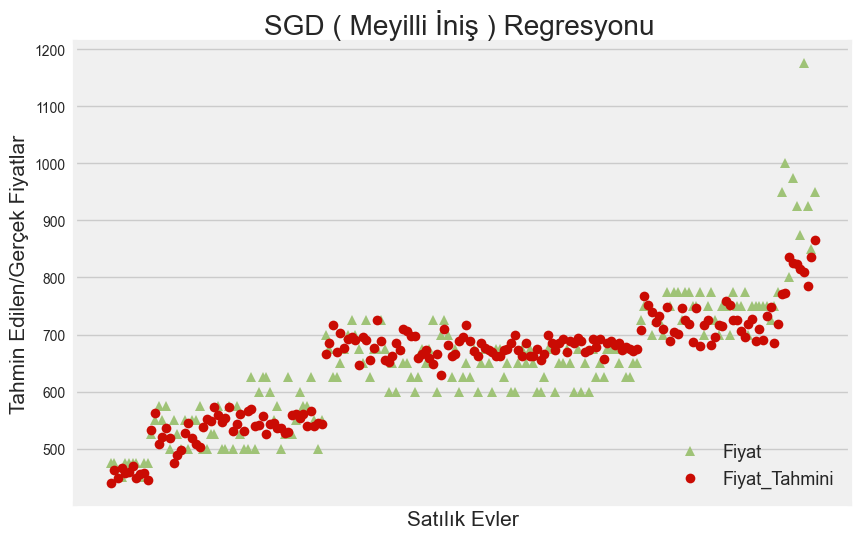

In [26]:
plt.figure(figsize=(10,6))
plt.style.use("fivethirtyeight")
plt.title("SGD ( Meyilli İniş ) Regresyonu ")
plt.xticks(df["Fiyat"],df.index.values)
plt.plot(df["Fiyat"],'g^',label="Fiyat")
plt.xticks(df["Tahmin_edilen_fiyat"],df.index.values)
plt.plot(df["Tahmin_edilen_fiyat"],"ro",label="Fiyat_Tahmini")
plt.xlabel("Satılık Evler",fontsize=15)
plt.ylabel("Tahmin Edilen/Gerçek Fiyatlar",fontsize=15)
plt.legend(fontsize=13,loc="lower right")
plt.show()

SGD optimizasyon algoritmasının elasticnet ile ürettiği modelin klasik doğrusal regresyon ile üretilen modele ne kadar yakın olduğunu 

gösterir yani klasik regresyon modeli en düşük hatayı veren model ile çok benzerdir demiştik. O zaman SGD optimizasyonu ve Doğrusal Regresyon karşılaştırması yapabiliriz.

In [27]:
MSE_train = mean_squared_error(Y_train,model.predict(X_train))
MSE_train = y_scaler.inverse_transform(MSE_train.reshape(-1,1))
print("SGD optimizasyonu sonucu train datası hatası; " ,MSE_train)

MSE_test = mean_squared_error(Y_test,model.predict(X_test))
MSE_test = y_scaler.inverse_transform(MSE_test.reshape(-1,1))
print("SGD optimizasyonu sonucu test datası hatası; ",MSE_test)

SGD optimizasyonu sonucu train datası hatası;  [[454.3634585]]
SGD optimizasyonu sonucu test datası hatası;  [[455.83693781]]


In [28]:
## Doğrusal Regresyon uygularsak:
from sklearn.linear_model import LinearRegression
X= df[["Oda_Sayısı","Net_m2","Katı","Yaşı"]]
y =df["Fiyat"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

LR = LinearRegression()
LR.fit(X_train,y_train)

y_train_pred_LR = LR.predict(X_train)
y_test_pred_LR= LR.predict(X_test)

print("Doğrusal regresyon modeli train hatası: " ,mean_squared_error(y_train,y_train_pred_LR)) # train hatası

print("Doğrusal regresyon modeli test hatası: " ,mean_squared_error(y_test,y_test_pred_LR)) # test sonucu hatası

print(LR.score(X_train,y_train)) # R2 ölçümü modelin doğruluk ölçüm değeri 
print(LR.score(X_test,y_test))


Doğrusal regresyon modeli train hatası:  3145.06273162715
Doğrusal regresyon modeli test hatası:  4115.003886902747
0.733739961656849
0.6987282352837989


### Sonuç ; 

Böylece SGD optimizyonu sonucu modelin hatası daha az çıktı ve klasik linear regresyon modelinin en düşük hataya sahip olmadığı ortaya çıktı.

Modelin Yanlılık Sorunu Var mı ?

Eğitim verisi üzerinden üretilen modelin eğitim verisini ne kadar hata ile öngördüğüne bakabiliriz MSE = 454 çıkmıştı kökünü alırsak yaklaşık 21 bin lira.

az bir yanlılık var diyebiliriz ama ev piyasa fiyatlarına baktığımız zaman oldukça makul.

Modelin Varyans Sorunu Var mı ? 

Eğitim verisi üzerinden oluşturulan modelin eğitim verisini tahmin hatası ile test verisini tahmin hatasını karşılaştırmamız gerekiyor.

Modelin test setini tahmin hatası MSE:455 kökü alındığında yaklaşık 21 bin lira. 


Modelin varyans sorunu oldukça düşük. eğitim setini de 21 bin lira olarak hata payı bulmuştuk.

Sonuç olarak R2 skorları açısından benzer sonuçlar çıksa da MSE hata performanslarına baktığımızda yanlılık-varyans sorunu açısından SGD modelinin doğrusal 

regresyonu optimize ettiği ortadadır.....

